# Bike Thefts Berlin - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

/Users/carlospumar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('../data/bike_thefts_series_total.csv', index_col=1, parse_dates=True)

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21253 entries, 2022-01-01 to 2023-12-02
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   year              21253 non-null  int64
 1   LOR               21253 non-null  int64
 2   bike_theft_count  21253 non-null  int64
dtypes: int64(3)
memory usage: 664.2 KB


In [4]:
df.head()

,year,LOR,bike_theft_count
ANGELEGT_AM,,,
2022-01-01,2022,1300730,1
2022-01-01,2022,2100106,1
2022-01-01,2022,2400623,1
2022-01-01,2022,3601142,1
2022-01-02,2022,1100206,1


In [5]:
bike_theft_series = df.drop(['year', 'LOR'], axis = 1)

## Analyze time series

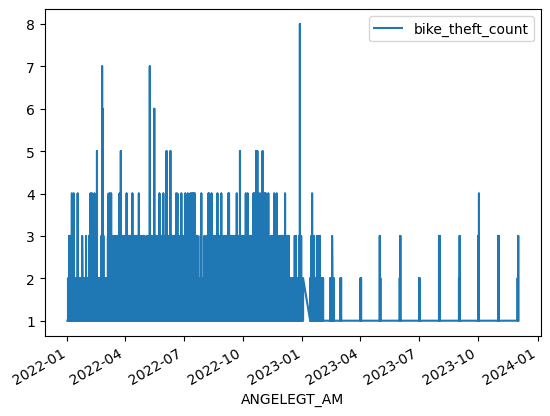

In [6]:
bike_theft_series.plot.line();

In [7]:
bike_theft_interpolated = bike_theft_series.loc['2023-01-01':'2023-02-19'].interpolate()

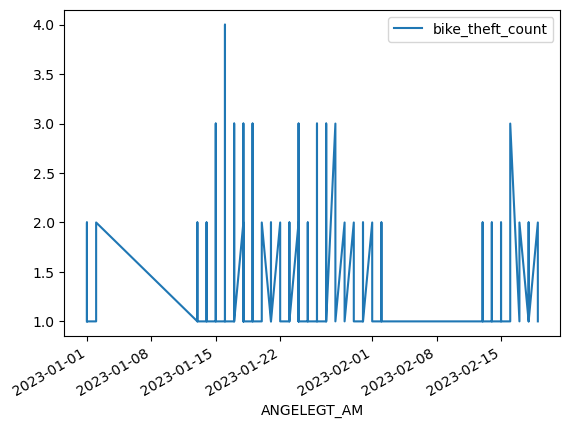

In [8]:
bike_theft_interpolated.plot.line();

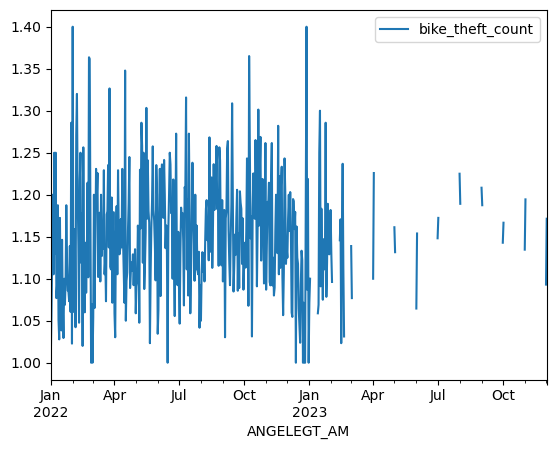

In [9]:
(bike_theft_series
.resample('D')  #change frequency
.mean()
.plot.line()
);

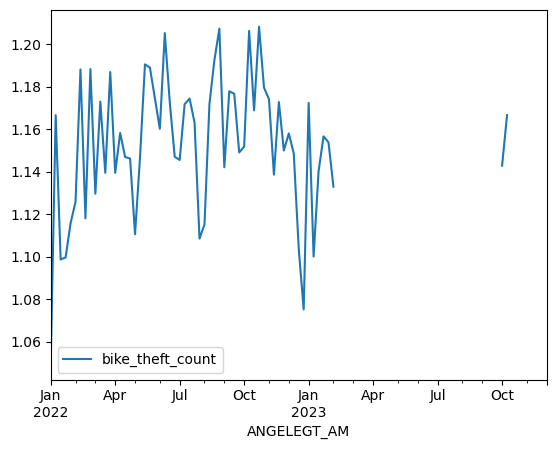

In [10]:
(bike_theft_series
.resample('W')  #change frequency
.mean()
.plot.line()
);

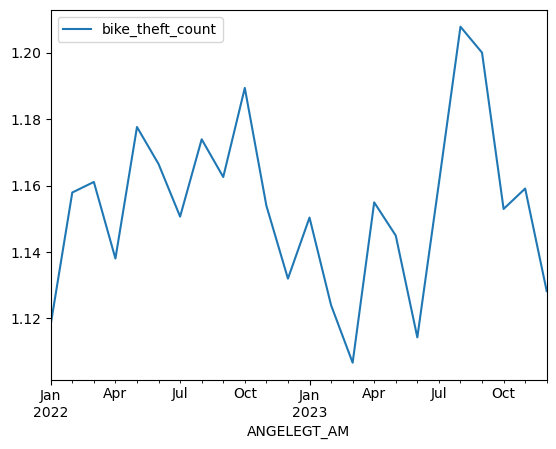

In [11]:
(bike_theft_series
.resample('M')  #change frequency
.mean()
.plot.line()
);

In [12]:
bike_theft_series.tail()

,bike_theft_count
ANGELEGT_AM,
2023-12-02,1
2023-12-02,1
2023-12-02,1
2023-12-02,1
2023-12-02,1


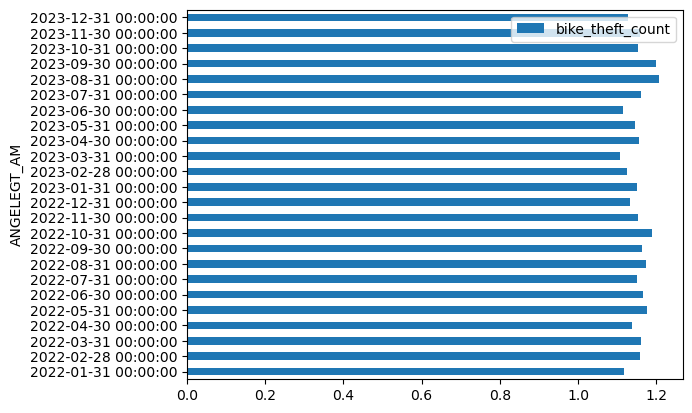

In [13]:
(bike_theft_series
.resample('M')  
.mean()
.plot.barh()
);

#### Plots seem to interpolate automatically once daily recs are downsampled to monthly values

### Interpolate linearly

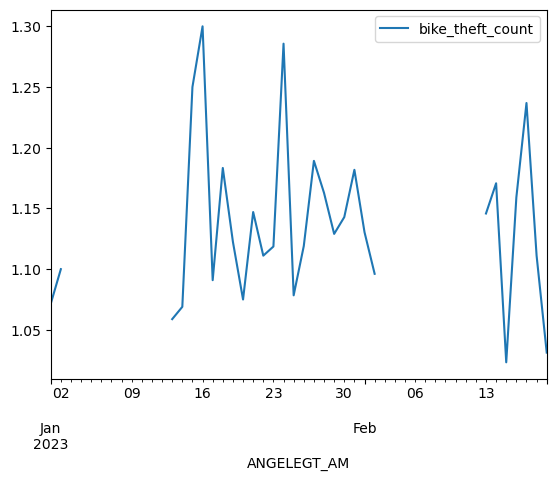

In [14]:
(bike_theft_series['2023-01-01':'2023-02-19']
.resample('D')  #change frequency
.mean()
.plot.line()
);

In [15]:
bike_theft_interpolated = bike_theft_series.loc['2023-01-01':'2023-02-19'].interpolate()

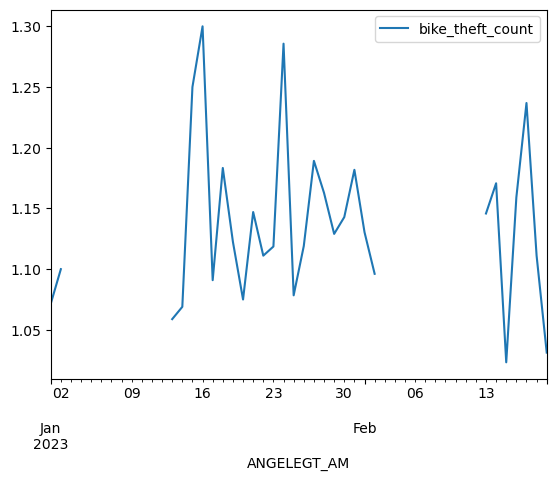

In [16]:
(bike_theft_interpolated
.resample('D')  #change frequency
.mean()
.plot.line()
);

### Fill missing vals with mean

In [17]:
bike_theft_series.mean()

bike_theft_count    1.157954
dtype: float64

In [18]:
bike_theft_filled = bike_theft_series.fillna(value=bike_theft_series.mean())

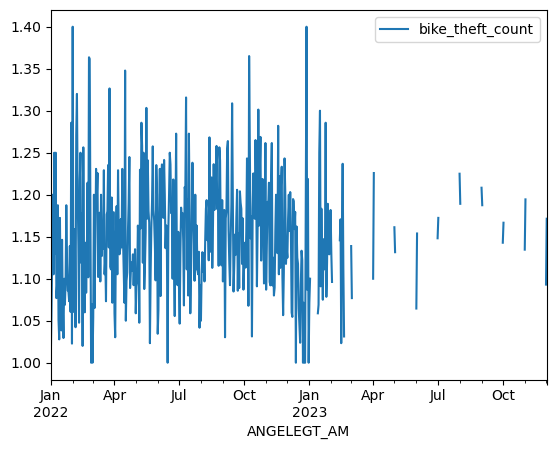

In [19]:
(bike_theft_filled
.resample('D')  #change frequency
.mean()
.plot.line()
);

#### Doesn't make sense to work with 2023 monthly values - if any, work with weekly vals...better: daily vals